<a href="https://colab.research.google.com/github/wodnjse/machine-learning/blob/main/K-Nearest-Neighbor/machine_learning_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 전체 데이터 리스트(생선의 길이와 무게)
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
#  두 파이썬 리스트 순회하면서 길이와 무게를 하나의 리스트로 담은 2차원 리스트
fish_data = [[l,w]for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

In [3]:
# 넘파이(numpy): 파이썬의 대표적인 배열 라이브러리
# 고차원의 배열을 손쉽게 만들고 조작할 수 있는 간편한 도구 제공
import numpy as np

In [14]:
# 파이썬 리스트를 넘파이 배열로 변환
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)
input_arr.shape

(49, 2)

In [5]:
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [6]:
np.random.seed(42)  # random seed: 일정한 결과를 얻기 위해 초기 설정
index = np.arange(49)  # arange(): 0부터 원하는 숫자까지 증가
np.random.shuffle(index)  # 랜덤하게 무작위로 섞음

In [16]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [17]:
# 훈련 데이터: 0 ~ 34: 35개
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [18]:
# 테스트 데이터: 35 ~ 끝: 14개
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

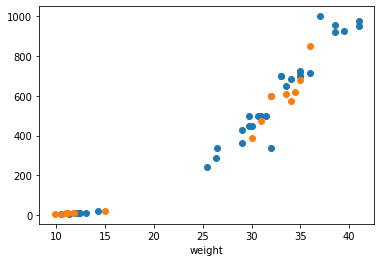

In [19]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.xlabel('weight')
plt.show()

🔼 </br>
파란색: 훈련세트</br>
주황색: 테스트 세트
양쪽에 도미, 빙어 모두 섞여있음

In [20]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [25]:
kn = kn.fit(train_input, train_target)  # train data로 학습
kn.score(test_input, test_target)  # test data로 평가

1.0

In [26]:
kn.predict(test_input)  # test data의 예측 결과

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [27]:
test_target  # test data의 실제 결과값

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

train data로 학습 후 평가 결과 ***1.0 (100%)***로 매우 우수함

*과연?*